Para solicitar os seus dados basta acessar sua conta Spotify pelo computador, clicar na área 'Configurações e privacidade' e ao final da página estará o campo necessário.
https://www.spotify.com/br/account/privacy/

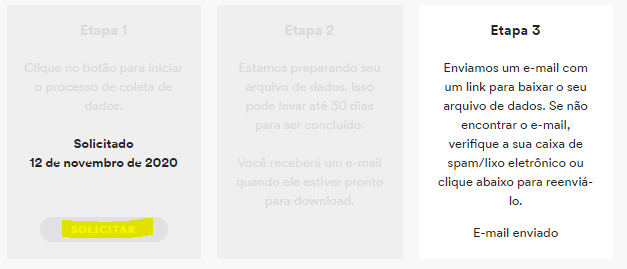

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
#Importar dados
data1 = pd.read_json('MyData/StreamingHistory0.json')
data2 = pd.read_json('MyData/StreamingHistory1.json')

In [3]:
#União dos dois dataframe 
data = pd.concat([data1, data2]).reset_index(drop=True)

In [4]:
#Conversão da coluna milisegundos para horas
data['hrPlayed'] = data.apply(lambda x: (x['msPlayed']/60000)/60, axis=1)

In [5]:
#Salvando o dataset único no diretório em formato CSV
data.to_csv('spotifyData.csv')

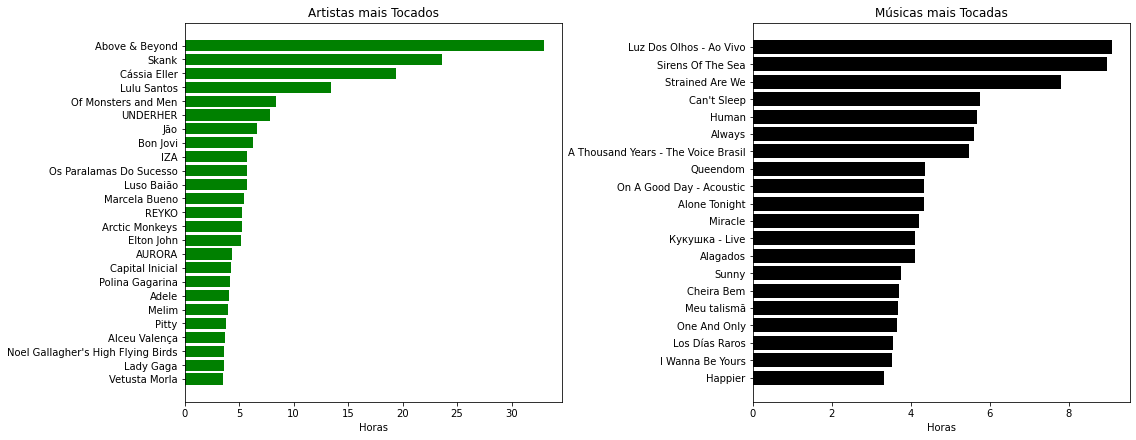

In [7]:
#Artistas mais ouvidos
df = data.groupby(['artistName']).sum().reset_index(level=['artistName']).sort_values('hrPlayed', ascending=False)[:25]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
fig.tight_layout(pad=16)
ax1.invert_yaxis()
ax1.set_title('Artistas mais Tocados')
ax1.set_xlabel('Horas')
ax1.barh(df['artistName'], df['hrPlayed'], color='g')

#Músicas mais ouvidas
df1 = data.groupby(['trackName']).sum().reset_index(level=['trackName']).sort_values('hrPlayed', ascending=False)[:20]
ax2.invert_yaxis()
ax2.set_title('Músicas mais Tocadas')
ax2.set_xlabel('Horas')
ax2.barh(df1['trackName'], df1['hrPlayed'], color='k');


In [8]:
#Divisão da coluna endTime em Data e horário
divisao = data['endTime'].str.split(' ')
data['Date'] = divisao.str.get(0)
data['Time'] = divisao.str.get(1)
data['Date'] = pd.to_datetime(data['Date'], format="%Y/%m/%d")
data['Time'] = pd.to_datetime(data['Time'], format="%H:%M")

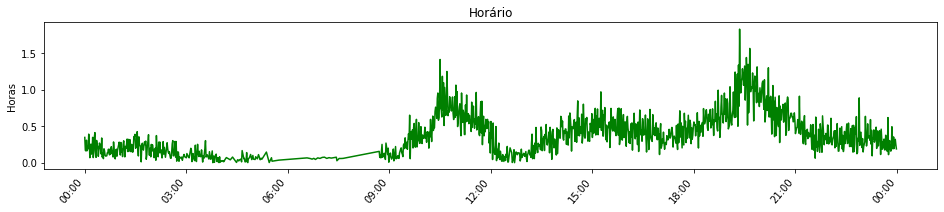

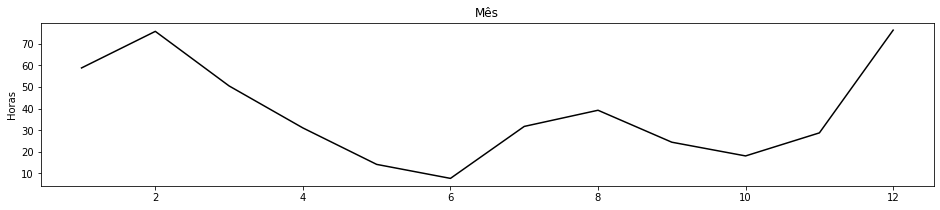

In [9]:
#Ocorrencias por horário
df4= data.groupby(['Time']).sum().reset_index(level=['Time'])
fig, ax = plt.subplots(1, figsize=(16,3))
fig.autofmt_xdate()
plt.xticks(rotation=50)
plt.title('Horário')
plt.ylabel('Horas')
plt.plot(df4['Time'],df4['hrPlayed'], c='g')
hours = mdates.HourLocator() 
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)

#Ocorrencias por mês
df5= data[['Date','hrPlayed']]
df5['Date'] = data['Date'].dt.month
df5 = df5.groupby(['Date']).sum().reset_index(level=['Date'])
plt.figure(figsize=(16,3))
plt.title('Mês')
plt.ylabel('Horas')
plt.plot(df5['Date'],df5['hrPlayed'], c='k');



In [10]:
a= round(data['hrPlayed'].sum(), 2)
b= data.groupby(['artistName']).sum().sort_values('hrPlayed', ascending=False).reset_index()[:1]['artistName'].values
c= data.groupby(['trackName']).sum().sort_values('hrPlayed', ascending=False).reset_index()[:1]['trackName'].values

In [11]:
pd.DataFrame({'Total Horas':a, 'Artista mais Tocado':b, 'Música mais Tocada':c})

,Total Horas,Artista mais Tocado,Música mais Tocada
0,456.55,Above & Beyond,Luz Dos Olhos - Ao Vivo
